Found 3069 images belonging to 2 classes.
Found 764 images belonging to 2 classes.
58889256/58889256 [==============================] - 12s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
11/95 [==>...........................] - ETA: 9:41 - loss: 0.7141 - accuracy: 0.

c:\Users\rajij\anaconda3\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


95/95 [==============================] - 847s 9s/step - loss: 0.6530 - accuracy: 0.6697 - val_loss: 0.5706 - val_accuracy: 0.9158
Epoch 2/10
95/95 [==============================] - 897s 9s/step - loss: 0.5430 - accuracy: 0.8561 - val_loss: 0.4668 - val_accuracy: 0.9565
Epoch 3/10
95/95 [==============================] - 925s 10s/step - loss: 0.4692 - accuracy: 0.8831 - val_loss: 0.4055 - val_accuracy: 0.9552
Epoch 4/10
95/95 [==============================] - 797s 8s/step - loss: 0.4228 - accuracy: 0.8851 - val_loss: 0.3701 - val_accuracy: 0.9375
Epoch 5/10
95/95 [==============================] - 976s 10s/step - loss: 0.3857 - accuracy: 0.8953 - val_loss: 0.3294 - val_accuracy: 0.9579
Epoch 6/10
95/95 [==============================] - 1022s 11s/step - loss: 0.3553 - accuracy: 0.9098 - val_loss: 0.2999 - val_accuracy: 0.9701
Epoch 7/10
95/95 [==============================] - 956s 10s/step - loss: 0.3357 - accuracy: 0.9032 - val_loss: 0.2820 - val_accuracy: 0.9715
Epoch 8/10
95/95 [=

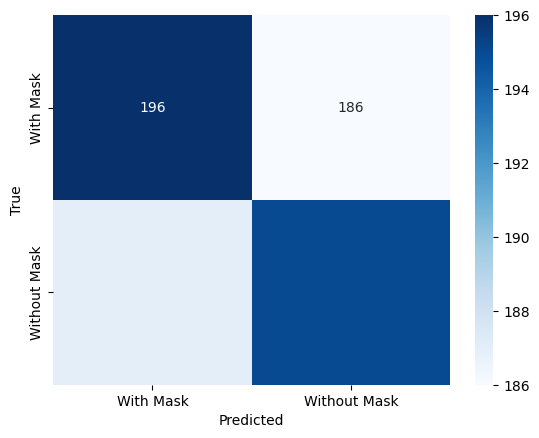

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# to load and preprocess the images.

# Preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'C:/Users/rajij/Downloads/dataset/train'
val_dir = 'C:/Users/rajij/Downloads/dataset/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Load the Pretrained VGG16 Model

# Load VGG16 model without the top layers (i.e., classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
base_model.trainable = False

# Create a new model on top of VGG16
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification: with mask or without mask
])

model.summary()

#Compile the Model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train the Model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

#Fine-tuning the Model

# Unfreeze the top layers of the base model
base_model.trainable = True

# Recompile the model after unfreezing layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

#. Evaluate the Model

# Get predictions
y_pred = model.predict(validation_generator, validation_generator.samples // validation_generator.batch_size)

# Convert predictions to binary (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Get true labels
y_true = validation_generator.classes

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['With Mask', 'Without Mask'], yticklabels=['With Mask', 'Without Mask'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import cv2
import numpy as np

# Load an image
img_path = 'C:/Users/rajij/Downloads/testmodel1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 1s 523ms/step
No mask detected.
1/1 [==============================] - 1s 523ms/step
No mask detected.


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 344ms/step
No mask detected.
1/1 [==============================] - 0s 344ms/step
No mask detected.


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel4.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 403ms/step
No mask detected.
1/1 [==============================] - 0s 403ms/step
No mask detected.


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel6.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel7.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 382ms/step
No mask detected.
1/1 [==============================] - 0s 382ms/step
No mask detected.


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel3_no.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:

SyntaxError: incomplete input (<ipython-input-7-7f0ad4f271ce>, line 12)

In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel3_no.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 370ms/step
Mask detected!
1/1 [==============================] - 0s 370ms/step
Mask detected!


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel6_no.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 430ms/step
Mask detected!
1/1 [==============================] - 0s 430ms/step
Mask detected!


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel1.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
if prediction[0] > 0.5:
    print("No Mask detected!")
else:
    print("Mask detected.")

1/1 [==============================] - 0s 396ms/step
Mask detected.
1/1 [==============================] - 0s 396ms/step
Mask detected.


In [ ]:
print(prediction)


[[3.0339448e-05]]


In [ ]:
img_path = 'C:/Users/rajij/Downloads/testmodel6_no.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))  # Resize to 224x224
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img / 255.0  # Rescale

# Make prediction
prediction = model.predict(img)
print(prediction)
if prediction[0] > 0.5:
    print("Mask detected!")
else:
    print("No mask detected.")

1/1 [==============================] - 0s 397ms/step
[[1.]]
Mask detected!


In [ ]:
# You can check how the labels are assigned by the generator
print(train_generator.class_indices)  # {'no_mask': 0, 'mask': 1}


{'with_mask': 0, 'without_mask': 1}


In [1]:
from tensorflow.keras.models import load_model

# Load the saved VGG16 model
model = load_model("C:/Users/rajij/Streamlit_Home Page/Face Mask Detection/vgg16_model")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


from tensorflow.keras.models import load_model

# Load the saved VGG16 model
model = load_model("C:/Users/rajij/Streamlit_Home Page/Face Mask Detection/vgg16_model")

validation_datagen = ImageDataGenerator(rescale=1./255)

val_dir = 'C:/Users/rajij/Downloads/dataset/test'

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

# Evaluate the model on validation data
val_labels = validation_generator.classes  # Actual labels
y_pred_probs = model.predict(validation_generator)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate the evaluation metrics
accuracy = accuracy_score(val_labels, y_pred)
precision = precision_score(val_labels, y_pred)
recall = recall_score(val_labels, y_pred)
f1 = f1_score(val_labels, y_pred)
conf_matrix = confusion_matrix(val_labels, y_pred)

# Print evaluation results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Found 764 images belonging to 2 classes.
24/24 [==============================] - 179s 7s/step
Accuracy: 0.4908376963350785
Precision: 0.49081364829396323
Recall: 0.4895287958115183
F1-score: 0.49017038007863695
Confusion Matrix:
[[188 194]
 [195 187]]
